<i>Trying new Hidden Method!</i><br>
--

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [40]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)

In [41]:
IMG_SIZE = 200

train_generator = train_datagen.flow_from_directory(
  '../input/african-wildlife',             
  target_size=(IMG_SIZE,IMG_SIZE),  
  batch_size=32,
  class_mode='categorical',         
  subset = 'training'
)
    
validation_generator = train_datagen.flow_from_directory(
  '../input/african-wildlife',
  target_size=(IMG_SIZE,IMG_SIZE),
  batch_size=32,
  class_mode='categorical',
  subset='validation'
)

testing_generator = test_datagen.flow_from_directory(
  '../input/african-wildlife',
  target_size=(IMG_SIZE,IMG_SIZE),
  batch_size=32,
  class_mode='categorical',
)

Found 1204 images belonging to 4 classes.
Found 300 images belonging to 4 classes.
Found 1504 images belonging to 4 classes.


In [42]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3) ), # Standard image shape
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(4, activation='softmax'),
])

In [43]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85):
      print("\nAccuracy better than target training!")
      self.model.stop_training = True

callbacks = myCallback()

In [45]:
%%time
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    callbacks=[callbacks]
)

Epoch 1/30
38/38 [==============================] - 23s 608ms/step - loss: 93.6955 - accuracy: 0.2889 - val_loss: 1.1630 - val_accuracy: 0.5367
Epoch 2/30
38/38 [==============================] - 23s 596ms/step - loss: 1.9637 - accuracy: 0.4172 - val_loss: 1.4183 - val_accuracy: 0.4367
Epoch 3/30
38/38 [==============================] - 23s 589ms/step - loss: 1.4134 - accuracy: 0.4860 - val_loss: 1.0739 - val_accuracy: 0.5267
Epoch 4/30
38/38 [==============================] - 22s 587ms/step - loss: 1.2994 - accuracy: 0.5364 - val_loss: 0.9941 - val_accuracy: 0.5367
Epoch 5/30
38/38 [==============================] - 23s 607ms/step - loss: 1.0860 - accuracy: 0.5274 - val_loss: 1.4998 - val_accuracy: 0.4367
Epoch 6/30
38/38 [==============================] - 23s 601ms/step - loss: 1.0768 - accuracy: 0.5508 - val_loss: 1.0112 - val_accuracy: 0.5367
Epoch 7/30
38/38 [==============================] - 22s 569ms/step - loss: 1.0923 - accuracy: 0.5798 - val_loss: 0.9861 - val_accuracy: 0.583

In [46]:
results = model.evaluate(testing_generator)
print("test loss, test acc:", results)

47/47 [==============================] - 22s 477ms/step - loss: 0.3338 - accuracy: 0.9142
test loss, test acc: [0.3338325321674347, 0.9142287373542786]


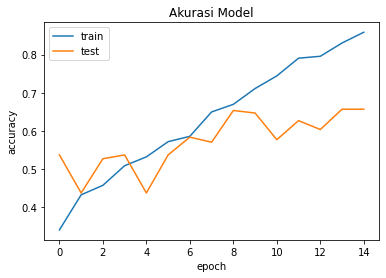

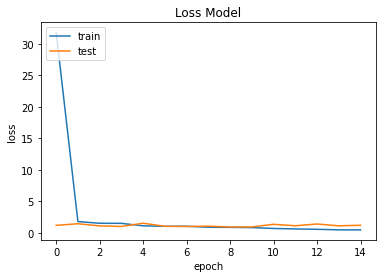

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
model.save("Model_Africa.h5")

In [50]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)